In [141]:
import pandas as pd
import os
import librosa

In [4]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
excel_file = "C:/Users/pavan/Music/Avi-Audio Net/DATASET/bird_songs_metadata.5.xlsx"
df = pd.read_excel(excel_file)

# Write the DataFrame to a CSV file
csv_file = 'C:/Users/pavan/Music/Avi-Audio Net/DATASET/bird_songs_metadata5.csv'
df.to_csv(csv_file, index=False)


In [113]:


audio_dataset_path='C:/Users/pavan/Music/Avi-Audio Net/DATASET/wavfiles'                    #change the path 
metadata = pd.read_csv('C:/Users/pavan/Music/Avi-Audio Net/DATASET/bird_songs_metadata5.csv')
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [115]:
metadata['name'].value_counts()


name
Eurasian Jay            1797
Song Sparrow            1255
Common Cuckoo           1213
House Sparrow           1192
Northern Mockingbird    1182
European Goldfinch      1108
Northern Cardinal       1074
Eurasian Bluetit        1073
American Robin          1017
Bewick's Wren            893
Name: count, dtype: int64

In [117]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [119]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]))
    final_class_labels=row["name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

11804it [06:17, 31.28it/s]


In [121]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','name'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,feature,name
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren


In [123]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["name"].tolist())

In [125]:
        import IPython.display as ipd
        import librosa
        import librosa.display
        import pandas as pd
        import os, time, warnings
        import seaborn as sns
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import (
            Dense,
            Conv1D,
            MaxPooling1D,
            BatchNormalization,
            Dropout, 
            Flatten,
            Conv2D,
            MaxPool2D,
        )

In [127]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))


In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  10623
Number of testing samples =  1181


In [131]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(2000, activation="relu", input_shape=(40,)))
ANN_Model.add(Dense(1000, activation="relu"))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

C:\Users\pavan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 2000)           │        82,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365,160 (12.84 MB)

 Trainable params: 3,365,160 (12.84 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
ANN_Model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [135]:
num_epochs = 50
num_batch_size = 32

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.2533 - loss: 2.9055 - val_accuracy: 0.5123 - val_loss: 1.2237
Epoch 2/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.5314 - loss: 1.1758 - val_accuracy: 0.5944 - val_loss: 1.0217
Epoch 3/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6066 - loss: 1.0214 - val_accuracy: 0.6139 - val_loss: 0.9843
Epoch 4/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6538 - loss: 0.9273 - val_accuracy: 0.6943 - val_loss: 0.8605
Epoch 5/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6964 - loss: 0.8189 - val_accuracy: 0.6943 - val_loss: 0.8711
Epoch 6/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7034 - loss: 0.7848 - val_accuracy: 0.7206 - val_loss: 0.8181
Epoch 7/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7234 - loss: 0.7440 - val_accuracy: 0.7197 - val_loss: 0.8096
Epoch 8/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7383 - loss: 0.7035 - val_acc

ANN Model Saved


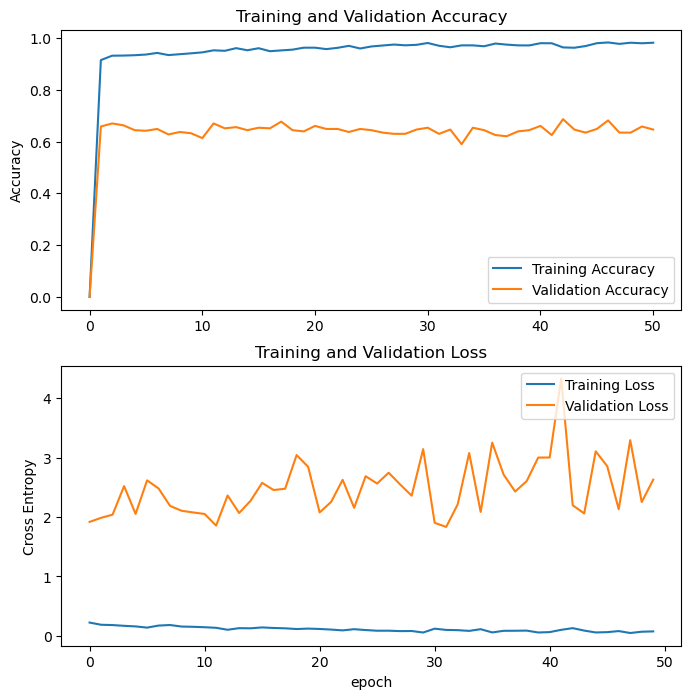

In [104]:
 acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()